In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sn 
from seaborn import distplot
from seaborn import heatmap
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
 
# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix


In [113]:
#from google.colab import drive   # use if the dataset in your drive
#drive.mount('/content/drive')

In [138]:

path = 'outliersRemoved.csv'  
raw_data = pd.read_csv(path)
raw_data

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,F6FF4BCA66C4048509928044D0434E22,0,16.99,20.34,18.30,0.00,20.44,18.12,15.12,0.00,...,0.00,0.00,0.00,0.00,0.00,0.23,0.48,0.50,0.48,0.48
16865,6C8977752F9B0ED22542BEF4D2C2DB4C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.30,11.15,10.91,10.80,10.64,11.33,13.10,13.71,10.07,9.41
16866,F66F854B48B27244F687DAA2BDEF53EE,0,3.77,2.90,2.61,2.80,2.64,3.17,3.66,4.03,...,5.74,4.80,5.47,4.67,4.49,4.09,3.21,4.63,3.14,4.81
16867,CDEE189856D947DC9488C7544B0D4013,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.92,5.38,6.90,6.78,6.09,6.88,6.58,8.35,5.18,6.38


<AxesSubplot:title={'center':'count "Target"'}>

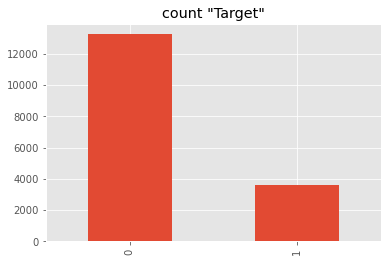

In [115]:
raw_data['FLAG'].value_counts().plot(kind='bar',title='count "Target"')


(16869, 1034)


<AxesSubplot:title={'center':'count "Target"'}>

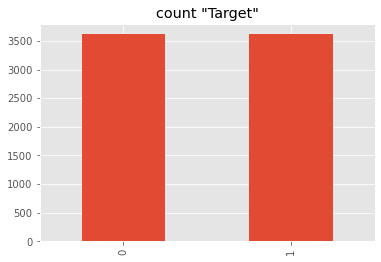

In [139]:
kWhs = raw_data.iloc[:, 2:]  #seperate the features and the label
labels = raw_data.iloc[:, 1]
print(kWhs.shape)
labels.shape



rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

kWhs,labels=rus.fit_resample(kWhs,labels)
labels.value_counts().plot(kind='bar',title='count "Target"')


In [140]:
kWhs

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,3.19,0.00,0.00,0.00,0.00,2.42,3.39,7.94,0.00,4.09,...,3.75,2.57,3.28,2.51,1.85,1.87,1.90,2.24,1.96,1.68
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11.06,11.53,10.17,8.35,10.25,10.60,9.67,10.00,11.01,12.81,...,13.55,9.85,12.42,12.63,13.53,12.94,14.03,13.28,11.53,11.14
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.20,3.81,5.76,1.08,5.47,1.33,3.34,1.26,5.02,0.93
4,5.72,6.88,6.65,7.46,6.83,5.87,6.88,6.00,7.19,6.16,...,1.82,2.08,1.45,1.82,2.48,2.37,2.85,2.35,1.79,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7226,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
7227,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,21.69,29.23,32.46,32.56,37.13,32.60,27.74,34.80,34.69,38.82
7228,27.39,80.88,94.42,89.45,75.71,53.74,62.40,85.50,85.27,67.31,...,395.62,356.94,333.40,255.05,249.93,279.94,385.25,335.39,292.34,333.03


In [141]:
X_scaled_std_padded=pd.DataFrame(X_scaled_std_padded)
labels=pd.DataFrame(labels)

df3_merged1 = pd.concat([X_scaled_std_padded,labels],axis=1,join='inner')

#df3_merged1.to_csv('Balanced_data.csv')

In [2]:
balance_data=pd.read_csv('Balanced_data.csv')
#balance_data
balance_data=balance_data.drop(['Unnamed: 0'],axis=1)
balance_data
#kWhs,labels=rus.fit_resample(kWhs,labels)
#labels.value_counts().plot(kind='bar',title='count "Target"')

,0,1,2,3,4,5,6,7,8,9,...,1027,1028,1029,1030,1031,1032,1033,1034,1035,FLAG
0,-0.300497,-2.147502,-2.147502,-2.147502,-2.147502,-0.746326,-0.184697,2.449746,-2.147502,0.220602,...,-0.694216,-1.076355,-1.064775,-1.047405,-0.850545,-1.012665,-1.174784,0.0,0.0,0
1,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,...,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,0.0,0.0,0
2,-0.288283,-0.183648,-0.486422,-0.891604,-0.468612,-0.390692,-0.597736,-0.524269,-0.299415,0.101315,...,0.061242,0.261607,0.130257,0.372921,0.205950,-0.183648,-0.270473,0.0,0.0,0
3,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,...,-1.029737,0.429592,-0.946632,-0.278465,-0.969901,0.280002,-1.079600,0.0,0.0,0
4,1.471074,2.007122,1.900837,2.275146,1.984016,1.540391,2.007122,1.600465,2.150376,1.674403,...,-0.331155,-0.026162,-0.076995,0.144818,-0.086237,-0.345018,-0.345018,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,...,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,0.0,0.0,1
7226,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,...,-0.434879,-0.434879,-0.434879,-0.434879,-0.426733,-0.434879,-0.434879,0.0,0.0,1
7227,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,...,4.241114,4.903518,4.246912,3.542472,4.565794,4.549849,5.148478,0.0,0.0,1
7228,-0.945341,-0.386460,-0.244990,-0.296918,-0.440478,-0.670027,-0.579545,-0.338189,-0.340592,-0.528244,...,1.433324,1.379828,1.693382,2.793695,2.272742,1.822942,2.248084,0.0,0.0,1


In [3]:
#kWhs = balance_data.iloc[:, 2:]  #seperate the features and the label
labels = balance_data.FLAG



In [4]:
balance_data_flag=balance_data.drop(['FLAG'],axis=1)
kWhs = balance_data_flag

<AxesSubplot:title={'center':'count "Target"'}>

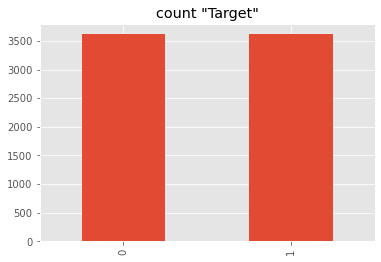

In [5]:
labels.value_counts().plot(kind='bar',title='count "Target"')

In [6]:
NUM_CONSUMERS, NUM_DAYS = kWhs.shape

print(NUM_CONSUMERS, NUM_DAYS)

7230 1036


Function to sacle data to try differant type of scaling and plote the data before and fter scaling

In [7]:

def scale_features(X=kWhs, scaling_strategy='Standard', plot_distributions=False):
  """Allows user to scale features for individual samples using specified scaling strategy.
  `Standard` - all features scaled to have mean 0, standard deviation of 1
  `MinMax` - all features scaled according to x - x_min / (x_max - x_min)
  `MaxAbs` - all features scaled according to x / abs(x_max)
  
  Returns matrix of scaled features as a numpy array.

  Also allows before/after plots of feature values to compare effect of scaling
  """
  # StandardScaler - all features will have mean of 0, and std deviation of 1
  if (scaling_strategy=='Standard'):
    # Instantiate a StandardScaler object
    scaler = StandardScaler()
  elif (scaling_strategy=='MinMax'):
    scaler = MinMaxScaler()
  elif (scaling_strategy=='MaxAbs'):
    scaler = MaxAbsScaler()

  # Make a copy of the features, transpose so that consumers become columns
  X_copy = X.copy().transpose()

  # Once consumers are in columns, scale each consumer using scaler object and retranspose results 
  # Retransposing ensures that in scaled data, the consumers are still rows
  X_scaled = scaler.fit_transform(X_copy).transpose() # THIS IS A NUMPY ARRAY, NOT A DATAFRAME

  # If the user has asked to compare distributions
  if plot_distributions:
    # First figure - before scaling
    plt.figure(figsize=(12, 6))
    distplot(X.values.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Unscaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - Before Scaling', fontsize=18)

    # Second figure - after scaling
    plt.figure(figsize=(12, 6))
    distplot(X_scaled.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Scaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - After {} Scaling'.format(scaling_strategy), fontsize=18)

  # Return the scaled features
  return X_scaled

C:\Users\syed azmat ali abedi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


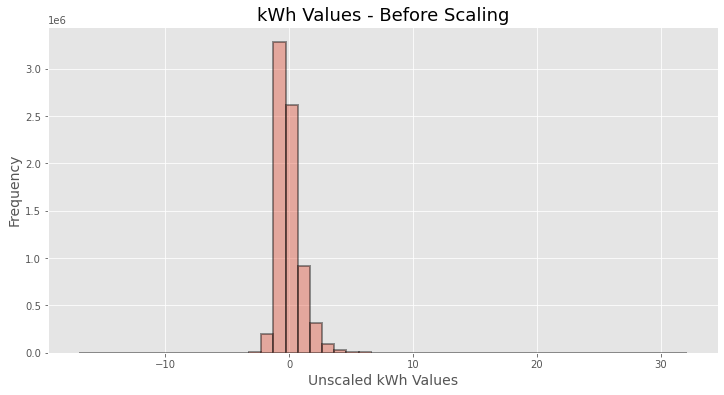

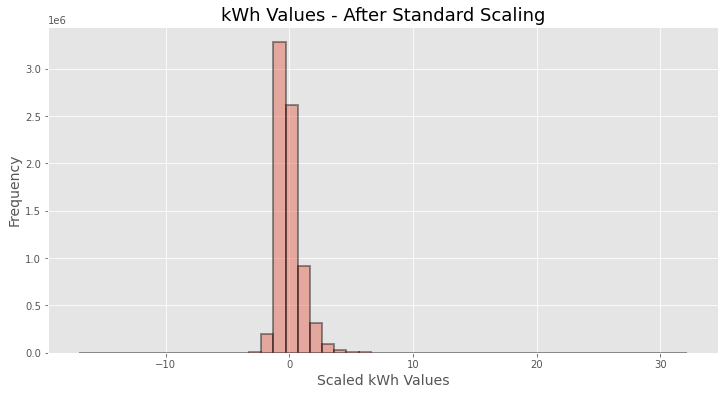

In [8]:
X_scaled_std = scale_features(X=kWhs,scaling_strategy='Standard', plot_distributions=True)

In [9]:
# Printing dimension of datatset for padding
NUM_DAYS = 1034
DAYS_PER_WEEK = 7
NUM_WEEKS_FLOAT = NUM_DAYS / DAYS_PER_WEEK 
NUM_WEEKS = int(np.ceil(NUM_WEEKS_FLOAT))
print(f"Number of days per dataset: {NUM_DAYS}.\nNumber of days per week: {DAYS_PER_WEEK}")
print(f"So exact number of weeks: {NUM_WEEKS_FLOAT}\nWhich, when rounded up is {NUM_WEEKS}")
print(f"Which means new number of days is: {NUM_WEEKS * DAYS_PER_WEEK}")
print(f"Extra days to add: {NUM_WEEKS * DAYS_PER_WEEK - NUM_DAYS}")

Number of days per dataset: 1034.
Number of days per week: 7
So exact number of weeks: 147.71428571428572
Which, when rounded up is 148
Which means new number of days is: 1036
Extra days to add: 2


In [10]:
# 2 extra days per consumer 
X_scaled_std_padded = np.append(X_scaled_std, np.zeros((NUM_CONSUMERS, 0)), 
                                axis=1)


In [11]:
# Are the last two columns (and only the last two columns) zero

pd.DataFrame(X_scaled_std_padded)

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,-0.300787,-2.149578,-2.149578,-2.149578,-2.149578,-0.747047,-0.184876,2.452114,-2.149578,0.220815,...,-0.248627,-0.694887,-1.077395,-1.065804,-1.048417,-0.851367,-1.013644,-1.175920,2.545040e-15,2.545040e-15
1,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,...,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,-0.564884,1.623823e-15,1.623823e-15
2,-0.288562,-0.183826,-0.486892,-0.892466,-0.469065,-0.391070,-0.598314,-0.524775,-0.299704,0.101413,...,0.014504,0.061301,0.261860,0.130382,0.373281,0.206149,-0.183826,-0.270735,3.941562e-16,3.941562e-16
3,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,-1.390094,...,0.526502,-1.030732,0.430007,-0.947547,-0.278735,-0.970839,0.280273,-1.080644,2.271936e-16,2.271936e-16
4,1.472496,2.009062,1.902674,2.277345,1.985934,1.541880,2.009062,1.602012,2.152455,1.676021,...,-0.502621,-0.331475,-0.026188,-0.077069,0.144958,-0.086320,-0.345352,-0.345352,4.496674e-16,4.496674e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,...,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-0.563816,-2.793258e-15,-2.793258e-15
7226,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,...,-0.435300,-0.435300,-0.435300,-0.435300,-0.435300,-0.427145,-0.435300,-0.435300,-4.438749e-16,-4.438749e-16
7227,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,...,4.230705,4.245213,4.908258,4.251017,3.545897,4.570207,4.554248,5.153455,4.033276e-16,4.033276e-16
7228,-0.946254,-0.386834,-0.245227,-0.297205,-0.440904,-0.670675,-0.580105,-0.338516,-0.340921,-0.528754,...,2.254126,1.434709,1.381162,1.695019,2.796395,2.274939,1.824704,2.250257,-1.896498e-16,-1.896498e-16


In [12]:
# Creating a new numpy array to store the training dat
X_reshaped = np.zeros((NUM_CONSUMERS, NUM_WEEKS, DAYS_PER_WEEK,1))


In [13]:
def transform_daily_to_weekly(daily_kWhs):
  """Will simply reshape the 1D daily kWhs of a single consumer into 2D weekly data""" 
  return daily_kWhs.reshape(NUM_WEEKS, DAYS_PER_WEEK, 1)

In [14]:
# Applying this function to every consumer in the original dataset
# And saving the (148, 7) kWhs matrix for that consumer at the ith index in 3D array
for i in range(0, NUM_CONSUMERS):
  X_reshaped[i] = transform_daily_to_weekly(X_scaled_std_padded[i])

In [15]:
print(X_reshaped.shape)
X_reshaped[0]

(7230, 148, 7, 1)


array([[[-3.00787279e-01],
        [-2.14957754e+00],
        [-2.14957754e+00],
        ...,
        [-2.14957754e+00],
        [-7.47046998e-01],
        [-1.84875663e-01]],

       [[ 2.45211359e+00],
        [-2.14957754e+00],
        [ 2.20814990e-01],
        ...,
        [-2.14957754e+00],
        [-2.14957754e+00],
        [-2.14957754e+00]],

       [[-2.14957754e+00],
        [ 2.23767710e+00],
        [ 2.26665500e+00],
        ...,
        [-2.14957754e+00],
        [-2.14957754e+00],
        [-2.14957754e+00]],

       ...,

       [[-2.13853567e-01],
        [ 5.85936579e-01],
        [ 4.00477994e-01],
        ...,
        [-4.57267960e-01],
        [-5.61588413e-01],
        [-9.84665809e-01]],

       [[-6.07953060e-01],
        [-5.44201671e-01],
        [ 2.37652442e-02],
        ...,
        [-2.48627052e-01],
        [-6.94886771e-01],
        [-1.07739510e+00]],

       [[-1.06580394e+00],
        [-1.04841720e+00],
        [-8.51367452e-01],
        ...,
        

In [16]:
print(X_reshaped.shape)
labels = np.asarray(labels)

(7230, 148, 7, 1)


In [17]:
print(labels.shape)

(7230,)


In [18]:


X_train, X_test, y_train, y_test= train_test_split(X_reshaped,labels,
                                                    test_size=0.2 
                                                    )




In [19]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5784, 148, 7, 1) (1446, 148, 7, 1) (5784,) (1446,)


# The Alexnet Artitecture 

In [21]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

from tensorflow.keras.regularizers import l2
Regularizer = l2(0.001)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=18, input_shape=(148,7,1), kernel_size=(3,3),\
 strides=(2,2), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
#model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=36, kernel_size=(3,3), strides=(2,2), padding='same'))
#model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=72, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=144, kernel_size=(3,3),strides=(2,2), padding='same'))
model.add(Activation('relu'))
#Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=288, kernel_size=(3,3),strides=(2,2), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
#model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(500))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC()]
                  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 3, 18)         180       
_________________________________________________________________
activation (Activation)      (None, 73, 3, 18)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 1, 18)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 1, 36)         5868      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 1, 36)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 1, 36)          144       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 1, 72)          2

In [22]:
# Fit the model, remember its training history
#epoch train test  

history = model.fit(X_train, y_train, 
                              epochs=100,
                             validation_split=0.40, verbose = 1,shuffle=True)

Epoch 1/100
109/109 [==============================] - 8s 62ms/step - loss: 0.9848 - auc: 0.5801 - val_loss: 0.7191 - val_auc: 0.6349
Epoch 2/100
109/109 [==============================] - 6s 51ms/step - loss: 0.6785 - auc: 0.6813 - val_loss: 0.6809 - val_auc: 0.6551
Epoch 3/100
109/109 [==============================] - 6s 51ms/step - loss: 0.6199 - auc: 0.7406 - val_loss: 0.7003 - val_auc: 0.6528
Epoch 4/100
109/109 [==============================] - 6s 51ms/step - loss: 0.5658 - auc: 0.7869 - val_loss: 0.6685 - val_auc: 0.7057
Epoch 5/100
109/109 [==============================] - 6s 51ms/step - loss: 0.5055 - auc: 0.8354 - val_loss: 0.7386 - val_auc: 0.6538
Epoch 6/100
109/109 [==============================] - 6s 52ms/step - loss: 0.4849 - auc: 0.8474 - val_loss: 0.7408 - val_auc: 0.7310
Epoch 7/100
109/109 [==============================] - 6s 52ms/step - loss: 0.4276 - auc: 0.8868 - val_loss: 0.7953 - val_auc: 0.7058
Epoch 8/100
109/109 [==============================] - 6s 51ms

Epoch 62/100
109/109 [==============================] - 7s 64ms/step - loss: 0.0956 - auc: 0.9938 - val_loss: 1.2541 - val_auc: 0.7144
Epoch 63/100
109/109 [==============================] - 8s 73ms/step - loss: 0.1005 - auc: 0.9931 - val_loss: 1.5595 - val_auc: 0.7284
Epoch 64/100
109/109 [==============================] - 7s 63ms/step - loss: 0.1124 - auc: 0.9922 - val_loss: 1.3692 - val_auc: 0.7282
Epoch 65/100
109/109 [==============================] - 6s 58ms/step - loss: 0.0674 - auc: 0.9965 - val_loss: 1.3741 - val_auc: 0.7277
Epoch 66/100
109/109 [==============================] - 6s 55ms/step - loss: 0.0826 - auc: 0.9956 - val_loss: 1.3738 - val_auc: 0.7269
Epoch 67/100
109/109 [==============================] - 5s 50ms/step - loss: 0.0862 - auc: 0.9950 - val_loss: 1.4234 - val_auc: 0.7353
Epoch 68/100
109/109 [==============================] - 5s 49ms/step - loss: 0.0835 - auc: 0.9946 - val_loss: 1.3804 - val_auc: 0.7324
Epoch 69/100
109/109 [==============================] -

In [23]:

model.save_weights("./Alexnet12_balanced_Weights")

In [27]:
def plot_history_loss(history, model_name, has_metrics=False, metric_name=None, 
                 loss_metric=None):
  """Plots training and validation loss, as well as optional metric"""
  # Extract loss from the history object
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = np.arange(1, len(loss) + 1)

  # Create a new figure for plotting loss
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.xlabel('Epochs', fontsize=14)
  plt.ylabel('Loss' if loss_metric is not None else loss_metric, fontsize=14)
  plt.title('Loss vs Validation Loss \n{}'.format('' if model_name is None else model_name), 
            fontsize=18)
  plt.legend()

  # If the user has also asked to plot a metric
  if has_metrics and metric_name is not None:
    # Create a new figure for plotting the metric
    plt.figure(figsize=(12, 6))
    metric = history.history[metric_name]
    val_metric = history.history['val_{}'.format_metric_name]
    
    plt.plot(epochs, metric, label='Loss')
    plt.plot(epochs, val_metric, label='Val_Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.title('Loss vs Validation Loss {}'.format(metric_name), fontsize=18)
    plt.legend()

In [42]:
def plot_history(history, model_name, has_metrics=False, metric_name=None, 
                 loss_metric=None):
  """Plots training and validation loss, as well as optional metric"""
  # Extract loss from the history object
  auc = history.history['auc']
  val_auc = history.history['val_auc']
  epochs = np.arange(1, len(auc) + 1)

  # Create a new figure for plotting loss
  plt.figure(figsize=(12, 6))
  plt.plot(epochs, auc, label='acc')
  plt.plot(epochs, val_auc, label='val_acc')
  plt.xlabel('Epochs', fontsize=14)
  plt.ylabel('accuracy' if loss_metric is not None else loss_metric, fontsize=14)
  plt.title('Accuracy vs Validation Accuracy \n{}'.format('' if model_name is None else model_name), 
            fontsize=18)
  plt.legend()

  # If the user has also asked to plot a metric
  if has_metrics and metric_name is not None:
    # Create a new figure for plotting the metric
    plt.figure(figsize=(30, 12))
    metric = history.history[metric_name]
    val_metric = history.history['val_{}'.format_metric_name]
    
    plt.plot(epochs, metric, label='accuracy')
    plt.plot(epochs, val_metric, label='Val_accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.title('accuracy vs Validation acuuracy {}'.format(metric_name), fontsize=18)
    plt.legend()

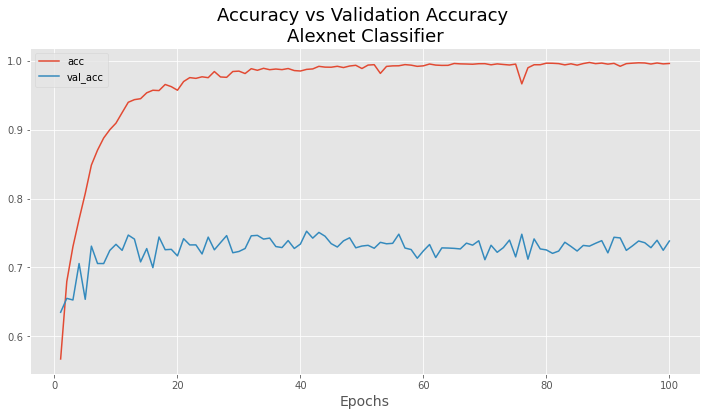

In [43]:
plot_history(history=history, 
             model_name='Alexnet Classifier')


In [44]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

In [62]:
_, X_val, _, y_val = train_test_split(X_train, y_train,   # Splitting training data
                                      stratify=y_train,
                                      random_state=42,    # Different from previous split
                                      shuffle=True, 
                                      test_size=0.3)

In [65]:
def get_classification_result(model, X_test, y_true, model_name=None, 
                              normalize_conf_mat='all'):
  """Displays classification report, confusion matrix, and ROC curve for a trained
  model using classification results on data provided"""
  # PREDICTIONS
  # First, get the predictions for the test data
  y_pred = model.predict_classes(X_test)

  # CLASSIFICATION REPORT
  print("classification report".upper(), end='\n')
  print(classification_report(y_true, y_pred, labels=[0, 1], 
                              target_names=['Regular Consumer', 'Thief']))
  
  # CONFUSION MATRIX
  if (normalize_conf_mat=='rows'):
    normalize='true'
  elif (normalize_conf_mat=='cols'):
    normalize='pred'
  else:
    normalize='all'

  # Using Seaborn to plot confusion matrix as a heatmap 
  conf_mat = confusion_matrix(y_true, y_pred, normalize=normalize)

  # Create a heatmap in lieu of the plot_confusion_matrix call in sklearn
  plt.figure(figsize=(8, 8))
  heatmap(conf_mat, annot=True, fmt='.5g', cmap='Blues', 
        xticklabels=['Predicted Reg', 'Predicted Thief'], 
        yticklabels=['True Reg', 'True Thief'])
  plt.title('Confusion Matrix ' + ('' if model_name is None else ' - ' + model_name))

  # ROC Curve
  plt.figure(figsize=(8, 8))
  y_pred_keras = model.predict(X_test).ravel()
  fpr, tpr, _ = roc_curve(y_true, y_pred_keras, pos_label=1)
  roc_auc = roc_auc_score(y_true, y_pred_keras)
  plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
  plt.xlabel('False Positive Rate', fontsize=14)
  plt.ylabel('True Positive Rate', fontsize=14)
  plt.title('ROC Curve' + ('' if model_name is None else (' - ' + model_name)))
  plt.legend(loc='lower right')
    
    
  #bar graph
  precision=precision_score(y_true,y_pred)
  recall=recall_score(y_true,y_pred)
  f1=f1_score(y_true,y_pred)
  print(precision) 
  print(f1)
  print(recall)
   
  data = {'Precision':precision, 'recall':recall, 'f1_score':f1}
  courses = list(data.keys())
  values = list(data.values())
  
  fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
  plt.bar(courses, values, color ='maroon',
        width = 0.4)
    
  plt.xlabel("performance chart")
  plt.ylabel("percentage value")
  plt.title("Confusion Matrics")
  plt.show()    

C:\Users\syed azmat ali abedi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CLASSIFICATION REPORT
                  precision    recall  f1-score   support

Regular Consumer       0.85      0.89      0.87       874
           Thief       0.88      0.83      0.86       862

        accuracy                           0.86      1736
       macro avg       0.86      0.86      0.86      1736
    weighted avg       0.86      0.86      0.86      1736

0.8843788437884379
0.8585074626865672
0.834106728538283


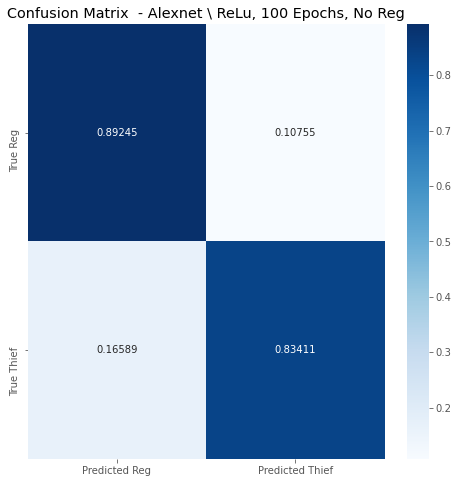

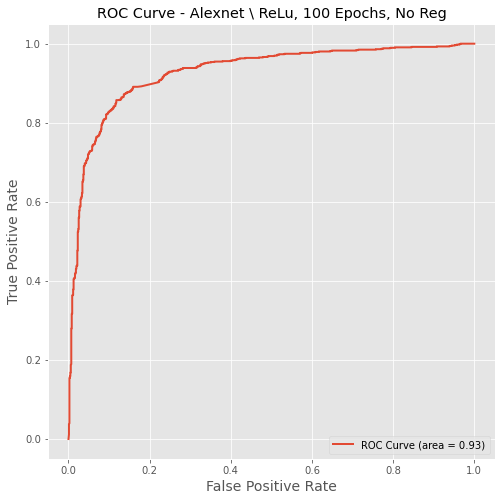

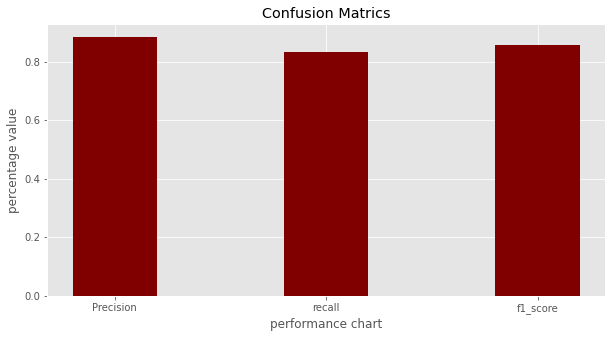

In [66]:

get_classification_result(model=model, X_test=X_val, y_true=y_val,
                          model_name='Alexnet \ ReLu, 100 Epochs, No Reg', 
                          normalize_conf_mat='rows')

In [1]:
def build_model():
  model = Sequential()

  #First conv layer
  model.add(Conv2D(filters = 18, kernel_size = (3,3), activation = 'tanh', input_shape = (148,7,1), padding ='same'))
  


 

  # Fully Connected layer
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))


  # Compile with reasonable defaults for this problem
  model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC()]
                  )
  
  return model


In [ ]:
#model = build_model()
#model.summary()